# ASSIGNMENT 3

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
# Univariate Analysis
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<AxesSubplot:xlabel='area', ylabel='price'>

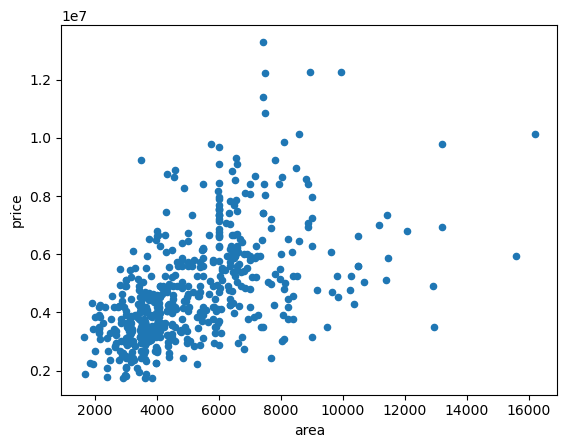

In [4]:
# Bi-Variate Analysis
data.plot.scatter(x='area', y='price')

<AxesSubplot:>

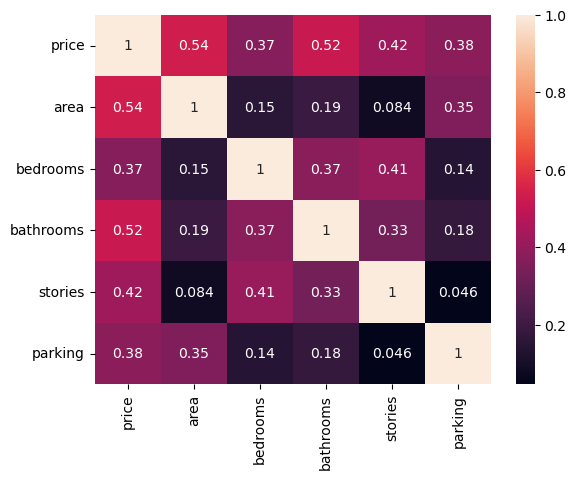

In [5]:
# Multi-Variate Analysis
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot=True)

In [6]:
#descriptive statistics
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [8]:
data.shape

(545, 12)

In [9]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [10]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

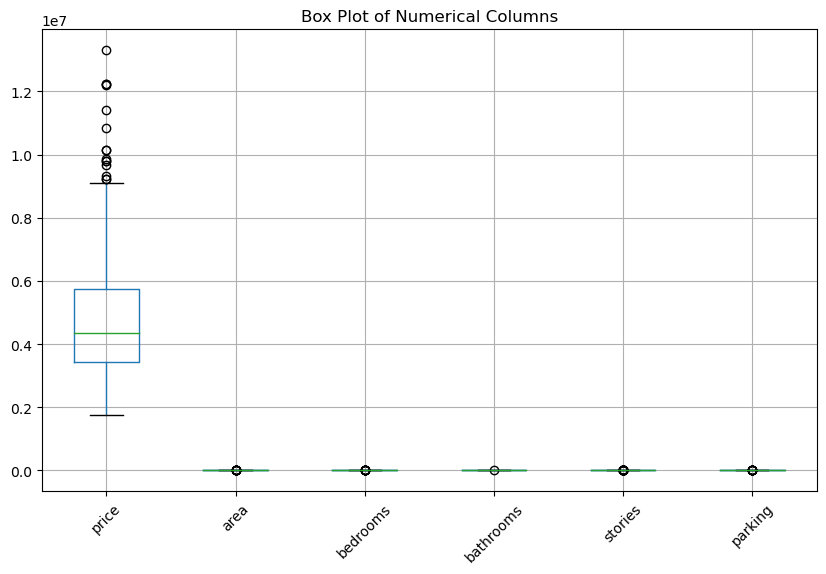

In [11]:
import matplotlib.pyplot as plt

numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# box plots
plt.figure(figsize=(10, 6))
data[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Columns')
plt.show()

In [12]:
lower_bound = data[numerical_cols].quantile(0.25) - 1.5 * (data[numerical_cols].quantile(0.75) - data[numerical_cols].quantile(0.25))
upper_bound = data[numerical_cols].quantile(0.75) + 1.5 * (data[numerical_cols].quantile(0.75) - data[numerical_cols].quantile(0.25))

# Remove outliers from the dataset
data_no_outliers = data[~((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)]

# Print the number of removed outliers
num_outliers_removed = len(data) - len(data_no_outliers)
print("Number of outliers removed:", num_outliers_removed)

Number of outliers removed: 82


In [13]:
# List of categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols)

print(data.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2            0   
1  12250000  8960         4          4        4        3            0   
2  12250000  9960         3          2        2        2            0   
3  12215000  7500         4          2        2        3            0   
4  11410000  7420         4          1        2        2            0   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0             1             1              0            1             0   
1             1             1              0            1             0   
2             1             1              0            0             1   
3             1             1              0            0             1   
4             1             0              1            0             1   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                   1                    0  

In [14]:
X = data.drop('price', axis=1)  # Independent variables
y = data['price']  # Dependent variable

In [15]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0
1,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
2,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1
541,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [16]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [17]:
#Scaling independent features
name=X.columns
scale=StandardScaler()
X=scale.fit_transform(X)

In [18]:
X

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ..., -0.58794474,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.58794474,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ...,  1.70084013,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.58794474,
        -0.84488844,  1.43589615]])

In [19]:
X=pd.DataFrame(X,columns=name)

In [20]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,1.517692,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,1.700840,-0.844888,-0.696429
1,1.757010,1.403419,5.405809,2.532024,2.679409,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,1.700840,-0.844888,-0.696429
2,2.218232,0.047278,1.421812,0.224410,1.517692,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,-0.587945,1.183588,-0.696429
3,1.083624,1.403419,1.421812,0.224410,2.679409,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,-1.472618,1.472618,1.700840,-0.844888,-0.696429
4,1.046726,1.403419,-0.570187,0.224410,1.517692,-0.405623,0.405623,-2.149083,2.149083,-1.361397,1.361397,0.219265,-0.219265,-1.472618,1.472618,1.700840,-0.844888,-0.696429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,-0.587945,-0.844888,1.435896
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,-0.587945,1.183588,-0.696429
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,-0.587945,-0.844888,1.435896
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,1.700840,-0.844888,-0.696429


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Building the Model
model = LinearRegression()

In [23]:
model

LinearRegression()

In [24]:
# Training the Model
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Testing the Model
y_pred = model.predict(X_test)

In [26]:
y_pred

array([5265567.3853211, 6705311.3853211, 3190431.3853211, 4753055.3853211,
       3420319.3853211, 3686559.3853211, 5839007.3853211, 6027423.3853211,
       2726047.3853211, 2605215.3853211, 9105055.3853211, 2873503.3853211,
       3133599.3853211, 3463839.3853211, 3891359.3853211, 5191839.3853211,
       3073695.3853211, 4946079.3853211, 4593823.3853211, 3681951.3853211,
       5259423.3853211, 5606559.3853211, 2801823.3853211, 4372639.3853211,
       5552799.3853211, 7189151.3853211, 3455135.3853211, 5413023.3853211,
       7909535.3853211, 3459231.3853211, 6044831.3853211, 3410079.3853211,
       6873247.3853211, 4345503.3853211, 3709087.3853211, 5926559.3853211,
       5104287.3853211, 4620447.3853211, 3186847.3853211, 4677791.3853211,
       4755103.3853211, 3608735.3853211, 6684831.3853211, 4106399.3853211,
       3870367.3853211, 4407455.3853211, 6839967.3853211, 4195999.3853211,
       3905695.3853211, 3600543.3853211, 7381151.3853211, 2869407.3853211,
       4493471.3853211, 4

In [27]:
# Measuring the performance using Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 1833135056283.0627
Mean Absolute Error (MAE): 986715.7290632103
R-squared (R2): 0.6373311741778098
